In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV

In [136]:
df = pd.read_excel('../data/Kickstarter.xlsx')
df = df[(df['state'] == 'successful') | (df['state'] == 'failed')]

# drop all columns that does not exist at the launch of a project
df.drop(['pledged','backers_count','state_changed_at','staff_pick',
         'backers_count','spotlight',
         'usd_pledged',
         'state_changed_at_weekday',
         'state_changed_at_month',
         'state_changed_at_day','state_changed_at_yr',
         'state_changed_at_hr','launch_to_state_change_days'
         ],axis=1,inplace=True)

# convert goal to usd
df['goal'] = df['goal']*df['static_usd_rate']

# drop columns for curerncy conversion
df.drop(['static_usd_rate','currency'],axis=1,inplace=True)

# drop all columns that have the same value
df.drop(['disable_communication'],axis=1,inplace=True)

# drop deadline_at, state_change_at, created_at, launched_at since the pre-processing is already done in other columns
df.drop(['deadline','created_at','launched_at'], axis=1, inplace=True)

# Assuming df is your DataFrame and 'column' is the column from which you want to remove outliers
z_scores = np.abs(stats.zscore(df['goal']))
df = df[(z_scores < 3)]

df.drop(['id','name'],axis=1,inplace=True)

# hours seem to be too granular, drop it for now
df.drop(['created_at_hr','launched_at_hr','deadline_hr'],axis=1,inplace=True)

# drop some dates
df.drop(['launched_at_day','launched_at_month','launched_at_yr'],axis=1,inplace=True)

df.drop(['created_at_weekday','launched_at_weekday','deadline_weekday'],axis=1,inplace=True)

df.drop(['country'],axis=1,inplace=True)

df

,goal,state,category,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_month,deadline_day,deadline_yr,created_at_month,created_at_day,created_at_yr,create_to_launch_days,launch_to_deadline_days
0,21449.83740,failed,Gadgets,8.0,8.0,18.0,14.0,3,19,2016,12,18,2015,62,30
1,10034.45163,successful,NaN,9.0,6.0,23.0,15.0,4,3,2016,2,8,2016,9,45
4,2000.00000,successful,Experimental,6.0,5.0,19.0,13.0,3,3,2016,2,16,2016,1,14
5,3000.00000,successful,Plays,6.0,4.0,19.0,14.0,4,18,2016,1,27,2016,21,60
6,35000.00000,failed,Gadgets,2.0,2.0,20.0,15.0,3,25,2016,1,24,2016,23,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15467,1200.00000,failed,Software,9.0,4.0,7.0,4.0,7,14,2009,5,15,2009,0,59
15469,2500.00000,failed,Software,1.0,1.0,22.0,15.0,7,14,2009,5,12,2009,0,62
15470,250.00000,failed,Software,5.0,5.0,22.0,15.0,6,1,2009,5,7,2009,0,24
15472,500.00000,successful,Software,5.0,3.0,22.0,15.0,6,15,2009,4,29,2009,0,46


In [137]:
df = pd.get_dummies(data=df,columns=['state'],drop_first=True)

# df = pd.get_dummies(data=df,columns=['created_at_weekday','launched_at_weekday','deadline_weekday'],drop_first=True)

df

,goal,category,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_month,deadline_day,deadline_yr,created_at_month,created_at_day,created_at_yr,create_to_launch_days,launch_to_deadline_days,state_successful
0,21449.83740,Gadgets,8.0,8.0,18.0,14.0,3,19,2016,12,18,2015,62,30,False
1,10034.45163,NaN,9.0,6.0,23.0,15.0,4,3,2016,2,8,2016,9,45,True
4,2000.00000,Experimental,6.0,5.0,19.0,13.0,3,3,2016,2,16,2016,1,14,True
5,3000.00000,Plays,6.0,4.0,19.0,14.0,4,18,2016,1,27,2016,21,60,True
6,35000.00000,Gadgets,2.0,2.0,20.0,15.0,3,25,2016,1,24,2016,23,37,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15467,1200.00000,Software,9.0,4.0,7.0,4.0,7,14,2009,5,15,2009,0,59,False
15469,2500.00000,Software,1.0,1.0,22.0,15.0,7,14,2009,5,12,2009,0,62,False
15470,250.00000,Software,5.0,5.0,22.0,15.0,6,1,2009,5,7,2009,0,24,False
15472,500.00000,Software,5.0,3.0,22.0,15.0,6,15,2009,4,29,2009,0,46,True


In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the column
df_known = df[df['category'].notna()]
df_unknown = df[df['category'].isna()]


known_cat = df_known['category']
df_known['category'] = le.fit_transform(known_cat)

# # Prepare the data for training the classifier
X_train = df_known.drop(columns=['category'],axis=1)
y_train = df_known['category']

X_test = df_unknown.drop(columns=['category'],axis=1)

# # Train the classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict the missing categories
pred = clf.predict(X_test)
pred = le.inverse_transform(pred)

df.loc[df['category'].isna(), 'category'] = pred 
# display(X_train)
# display(y_train)
# df['category'] = le.inverse_transform(df['category'])

/var/folders/_t/yhfwr7zs235_z88czy6gmp2m0000gn/T/ipykernel_17620/2300669466.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_known['category'] = le.fit_transform(known_cat)


In [139]:
df = pd.get_dummies(data=df,columns=['category'],drop_first=True)

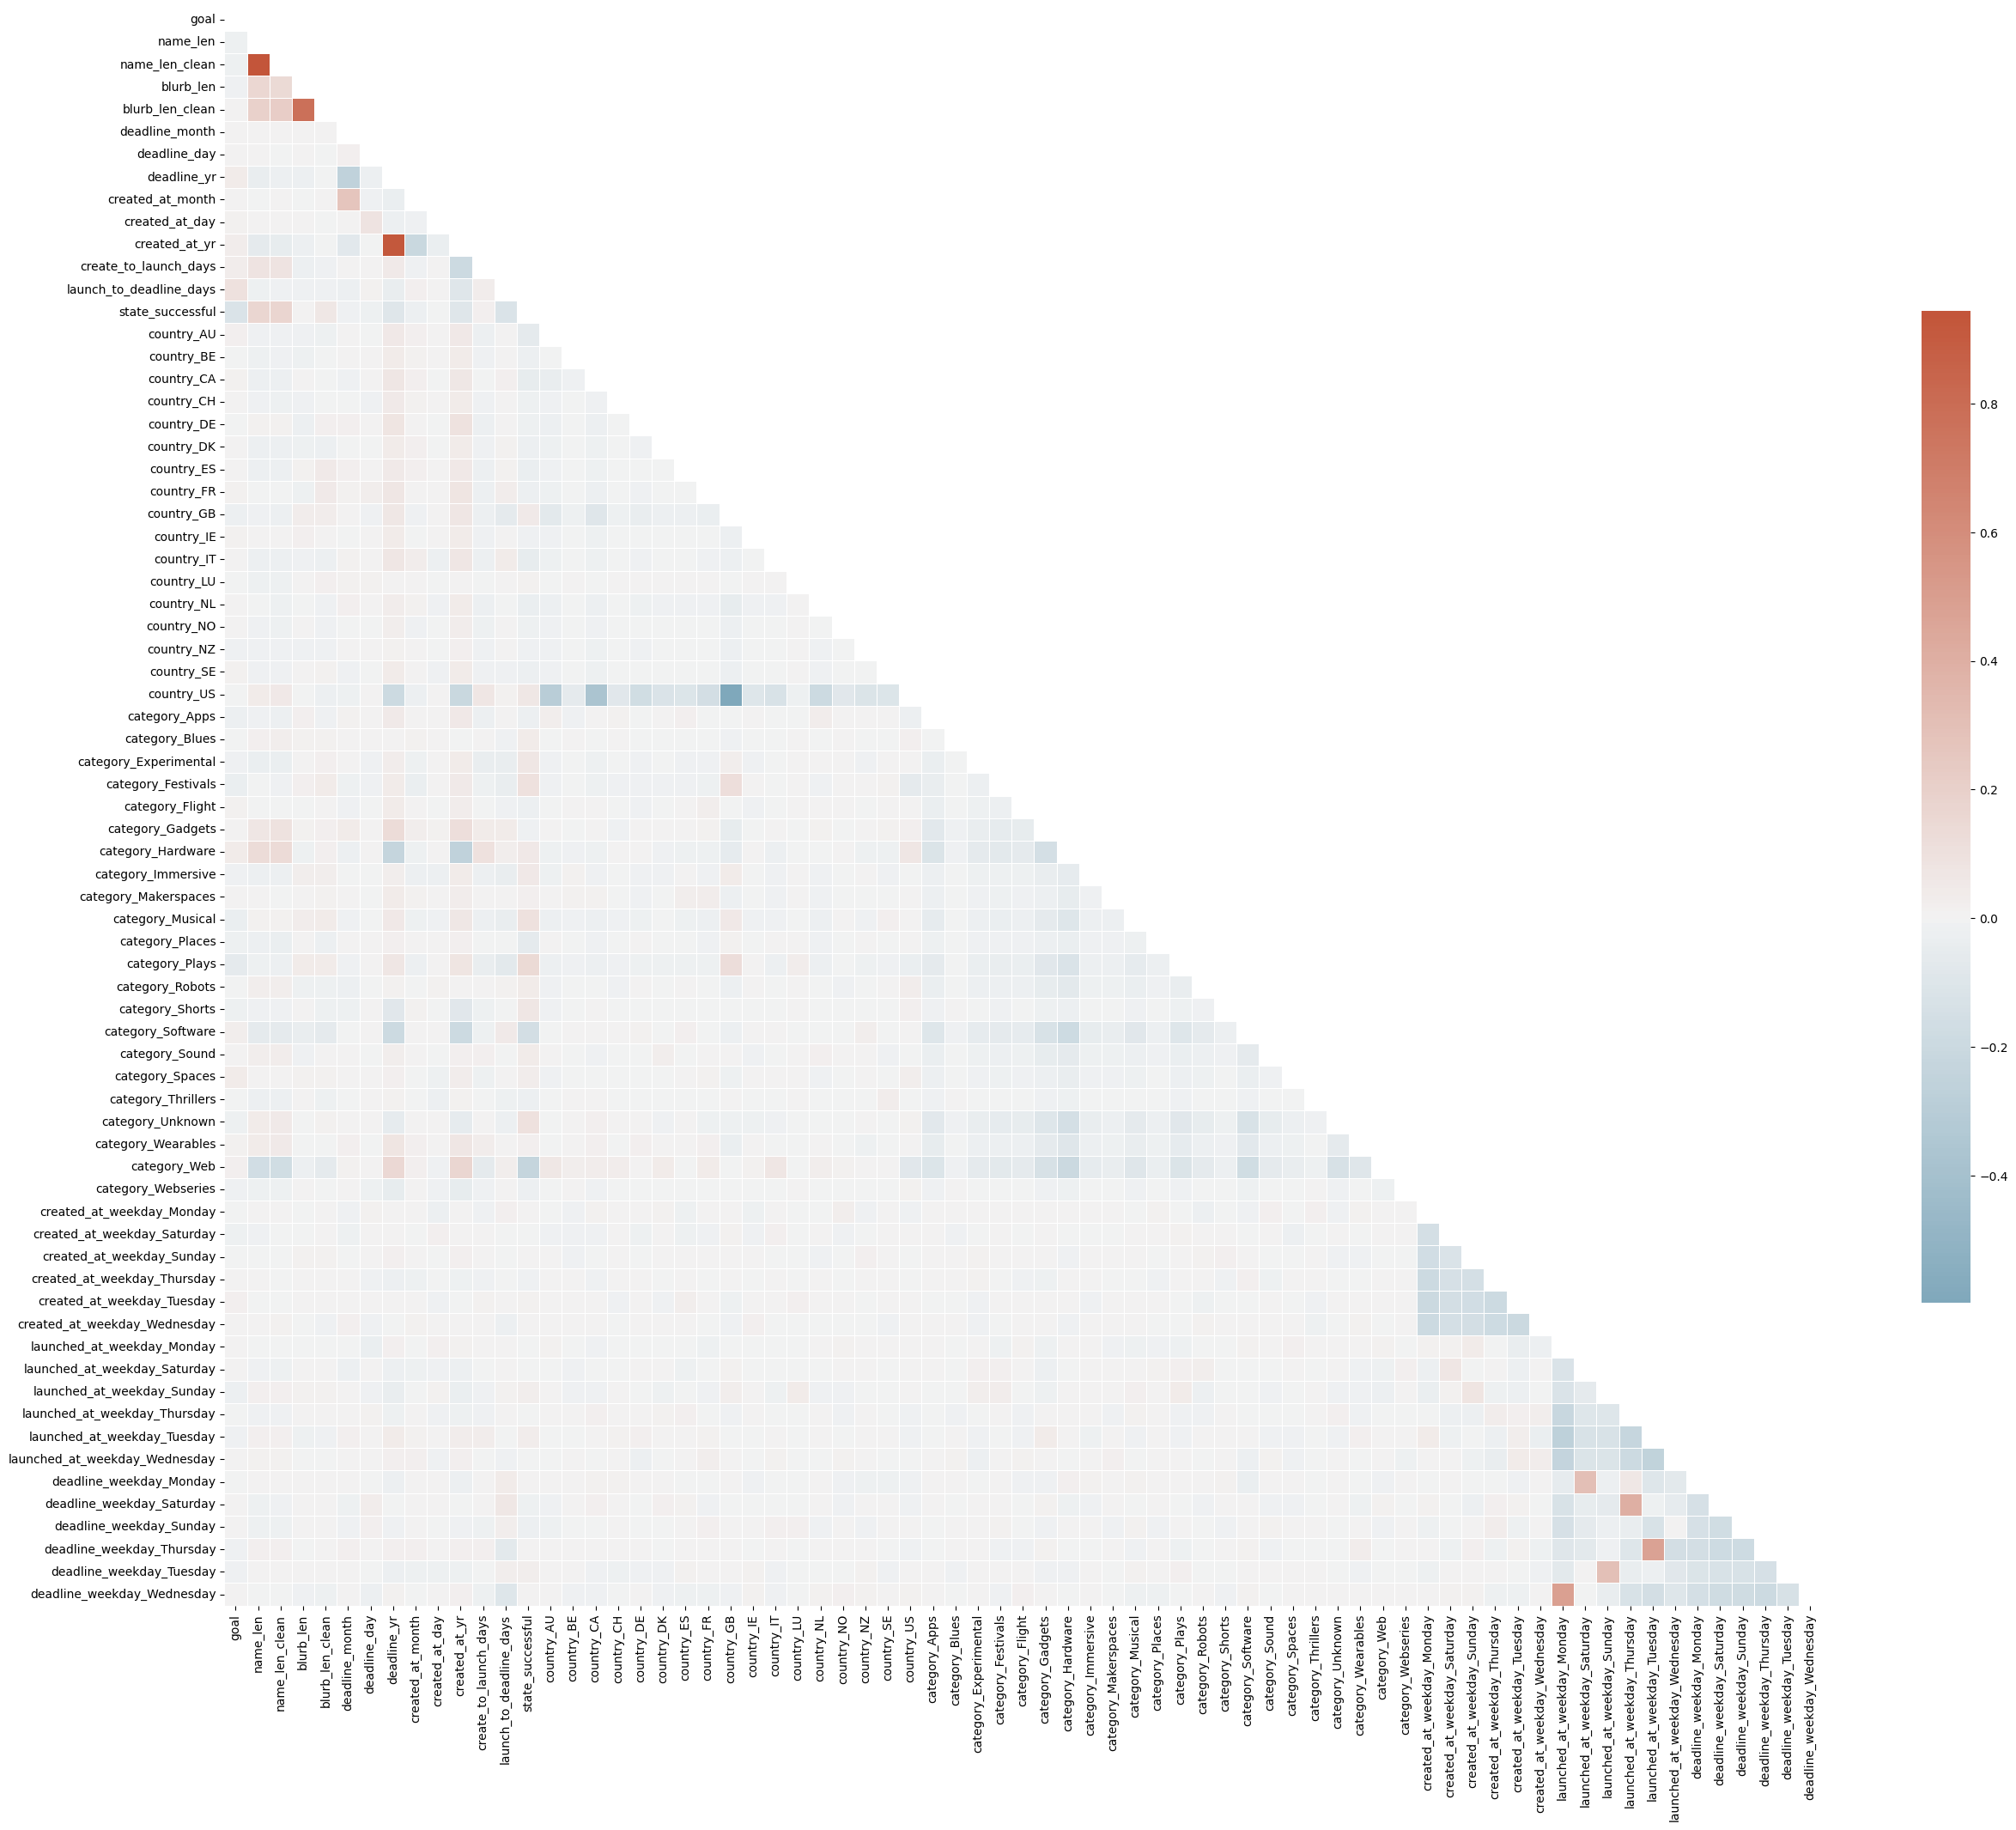

In [49]:
numerical_df = df#.select_dtypes(include=[np.number])
# numerical_df['state_True'] = pd.get_dummies(df['state'],drop_first=True)

corr = numerical_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)
plt.show()

In [54]:
df

,goal,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_month,deadline_day,deadline_yr,created_at_month,created_at_day,...,category_Robots,category_Shorts,category_Software,category_Sound,category_Spaces,category_Thrillers,category_Unknown,category_Wearables,category_Web,category_Webseries
0,21449.83740,8.0,8.0,18.0,14.0,3,19,2016,12,18,...,False,False,False,False,False,False,False,False,False,False
1,10034.45163,9.0,6.0,23.0,15.0,4,3,2016,2,8,...,False,False,False,False,False,False,True,False,False,False
4,2000.00000,6.0,5.0,19.0,13.0,3,3,2016,2,16,...,False,False,False,False,False,False,False,False,False,False
5,3000.00000,6.0,4.0,19.0,14.0,4,18,2016,1,27,...,False,False,False,False,False,False,False,False,False,False
6,35000.00000,2.0,2.0,20.0,15.0,3,25,2016,1,24,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15467,1200.00000,9.0,4.0,7.0,4.0,7,14,2009,5,15,...,False,False,True,False,False,False,False,False,False,False
15469,2500.00000,1.0,1.0,22.0,15.0,7,14,2009,5,12,...,False,False,True,False,False,False,False,False,False,False
15470,250.00000,5.0,5.0,22.0,15.0,6,1,2009,5,7,...,False,False,True,False,False,False,False,False,False,False
15472,500.00000,5.0,3.0,22.0,15.0,6,15,2009,4,29,...,False,False,True,False,False,False,False,False,False,False


In [140]:
# train test split
from sklearn.model_selection import train_test_split
df.rename({"state_successful":"state"},axis=1,inplace=True)
X = df.drop(['state'],axis=1)
y = df['state']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [151]:
# run lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
lasso = Lasso(alpha=0.1)
# parameters = {'alpha':[0.1,1,10,100,1000,10000]}
# lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
# lasso_regressor.fit(X_train,y_train)
lasso.fit(X_train,y_train)
res = pd.DataFrame({"name":X_train.columns,"score":lasso.coef_})
display(res.sort_values(by='score',ascending=False))

# print(lasso_regressor.best_params_)
# print(lasso_regressor.best_score_)
# print(lasso_regressor.best_estimator_)
# print(lasso_regressor.best_index_)
# print(lasso_regressor.cv_results_)
# print(lasso_regressor.scorer_)


,name,score
1,name_len,1.393088e-02
11,create_to_launch_days,1.079334e-04
18,category_Gadgets,-0.000000e+00
19,category_Hardware,0.000000e+00
20,category_Immersive,0.000000e+00
21,category_Makerspaces,0.000000e+00
22,category_Musical,0.000000e+00
23,category_Places,-0.000000e+00
24,category_Plays,0.000000e+00
17,category_Flight,-0.000000e+00


## Logistic Regression

In [152]:
# run logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

# evaluate model
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

       False       0.69      0.93      0.79      2662
        True       0.58      0.19      0.29      1360

    accuracy                           0.68      4022
   macro avg       0.64      0.56      0.54      4022
weighted avg       0.65      0.68      0.62      4022



## Decision Tree

In [75]:
# run decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree_params = {'criterion':['gini','entropy'],
                'splitter':['best'],
                'max_depth':[10,20,30,40,50],
                'min_samples_split':[2],
                'min_samples_leaf':[30],
                'max_features':[None]}

dtree_grid = GridSearchCV(dtree,dtree_params,cv=5)
dtree_grid.fit(X_train,y_train)

print(dtree_grid.best_params_)
print(dtree_grid.best_score_)
print(dtree_grid.best_estimator_)
print(dtree_grid.best_index_)


{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 30, 'min_samples_split': 2, 'splitter': 'best'}
0.7162203670739838
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=30)
5


dtree_params = {'criterion':['gini','entropy'],
                'splitter':['best'],
                'max_depth':[10,20,30,40,50],
                'min_samples_split':[2,5,10],
                'min_samples_leaf':[10,20,30,40,50],
                'max_features':[None]}

{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 30, 'min_samples_split': 2, 'splitter': 'best'}


In [154]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=10,max_features=None,min_samples_leaf=30,min_samples_split=2,splitter="best")
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

# evaluate model
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.77      0.84      0.80      2662
        True       0.61      0.50      0.55      1360

    accuracy                           0.72      4022
   macro avg       0.69      0.67      0.68      4022
weighted avg       0.72      0.72      0.72      4022



## Random Forest

In [155]:
# run random forest
from sklearn.ensemble import RandomForestClassifier

grid_param = {"n_estimators":[500,600,700,800,900],
                "criterion":['gini','entropy'],
                "max_depth":[10,20,30,40,50],
                "min_samples_split":[2],
                "min_samples_leaf":[30],
                "max_features":[None]
             }

rfc = RandomForestClassifier(criterion="entropy",max_depth=10,max_features=None,min_samples_leaf=30,min_samples_split=2)
rfc_grid = GridSearchCV(estimator=rfc,param_grid=grid_param,cv=10)
rfc_grid.fit(X_train,y_train)

print(rfc_grid.best_params_)
print(rfc_grid.best_score_)
print(rfc_grid.best_estimator_)

KeyboardInterrupt: 

In [161]:
X_train_short = X_train[['goal','name_len_clean','create_to_launch_days','launch_to_deadline_days']]
X_test_short = X_test[['goal','name_len_clean','create_to_launch_days','launch_to_deadline_days']]

In [162]:
rfc = RandomForestClassifier(criterion="entropy",max_depth=10,max_features=None,min_samples_leaf=30,min_samples_split=2)
rfc.fit(X_train_short,y_train)
rfc_pred = rfc.predict(X_test_short)

print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       False       0.74      0.87      0.80      2662
        True       0.60      0.39      0.47      1360

    accuracy                           0.71      4022
   macro avg       0.67      0.63      0.63      4022
weighted avg       0.69      0.71      0.69      4022



In [156]:
rfc = RandomForestClassifier(criterion="entropy",max_depth=10,max_features=None,min_samples_leaf=30,min_samples_split=2)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       False       0.78      0.85      0.81      2662
        True       0.64      0.54      0.59      1360

    accuracy                           0.74      4022
   macro avg       0.71      0.69      0.70      4022
weighted avg       0.74      0.74      0.74      4022



## KNN
In general KNN does not work well with large number of predictors

In [157]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_params = {'n_neighbors':[50,60,70,80,90,100],
              "weights":["uniform"],
              "algorithm":["auto","ball_tree","kd_tree","brute"],
              "leaf_size":[10,20,30,40,50],
              "p":[1,2]}
knn_grid = GridSearchCV(knn,knn_params,cv=5)
knn_grid.fit(X_train.values,y_train.values)

print(knn_grid.best_params_)
print(knn_grid.best_score_)
print(knn_grid.best_estimator_)


{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_neighbors': 70, 'p': 1, 'weights': 'uniform'}
0.6666665720033669
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=70, p=1)


knn_params = {'n_neighbors':[50,60,70,80,90,100],
              "weights":["uniform"],
              "algorithm":["auto","ball_tree","kd_tree","brute"],
              "leaf_size":[10,20,30,40,50],
              "p":[1,2]}

{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_neighbors': 70, 'p': 1, 'weights': 'uniform'}
0.6666665720033669

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print(classification_report(y_test,knn_pred))

## Gradient Boosting

In [91]:
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb_params = {'n_estimators':[400,425,450,475,500],
             'learning_rate':[0.001,0.05,0.1],
             'max_depth':[1,2],
             'warm_start':[True,False]
             }
gb_grid = GridSearchCV(gb,gb_params,cv=10)
gb_grid.fit(X_train,y_train)

print(gb_grid.best_params_)
print(gb_grid.best_score_)
print(gb_grid.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 450, 'warm_start': True}
0.7473364578295196
GradientBoostingClassifier(max_depth=2, n_estimators=450, warm_start=True)


In [143]:
gb = GradientBoostingClassifier(learning_rate=0.1,max_depth=2,n_estimators=450)

gb.fit(X_train,y_train)

# evaluate model
from sklearn.metrics import classification_report
print(classification_report(y_test,gb.predict(X_test)))


              precision    recall  f1-score   support

       False       0.79      0.86      0.82      2662
        True       0.66      0.56      0.60      1360

    accuracy                           0.75      4022
   macro avg       0.73      0.71      0.71      4022
weighted avg       0.75      0.75      0.75      4022



In [163]:
gb = GradientBoostingClassifier(learning_rate=0.1,max_depth=2,n_estimators=450)

gb.fit(X_train_short,y_train)

# evaluate model
from sklearn.metrics import classification_report
print(classification_report(y_test,gb.predict(X_test_short)))


              precision    recall  f1-score   support

       False       0.74      0.87      0.80      2662
        True       0.60      0.40      0.48      1360

    accuracy                           0.71      4022
   macro avg       0.67      0.63      0.64      4022
weighted avg       0.69      0.71      0.69      4022



gb_params = {'n_estimators':[100,200,300,400,500],
             'learning_rate':[0.1,0.2,0.3,0.4,0.5],
             'max_depth':[1,2,3,4,5]}
             
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 400}

With year, month categorical, day non-categorical: 0.75

With year, month, day categorical: 0.75

With year, month categorical, dropped day: 0.75

With month categorical , dropped year: 0.74

With year, day of week categorical, dropped month day: 0.75

With only year categorical: 0.75


## ANN

In [ ]:
# ann
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()

ann_params = {'hidden_layer_sizes':[(100,),(200,),(300,),(400,),(500,)],
                'activation':['identity','logistic','tanh','relu'],
                'solver':['lbfgs','sgd','adam'],
                'learning_rate':['constant','invscaling','adaptive']}
ann_grid = GridSearchCV(ann,ann_params,cv=5)
ann_grid.fit(X_train,y_train)

print(ann_grid.best_params_)
print(ann_grid.best_score_)
print(ann_grid.best_estimator_)

ann_params = {'hidden_layer_sizes':[(100,),(200,),(300,),(400,),(500,)],
                'activation':['identity','logistic','tanh','relu'],
                'solver':['lbfgs','sgd','adam'],
                'learning_rate':['constant','invscaling','adaptive']}

{'activation': 'identity', 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'solver': 'adam'}

0.6807359995819668

MLPClassifier(activation='identity', hidden_layer_sizes=(200,))

## PCA

not a good idea

In [158]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [159]:
# run gradient boosting on pca
gb = GradientBoostingClassifier(learning_rate=0.1,max_depth=2,n_estimators=400)
gb.fit(X_train_pca,y_train)
predictions = gb.predict(X_test_pca)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.70      0.89      0.78      2662
        True       0.55      0.27      0.36      1360

    accuracy                           0.68      4022
   macro avg       0.63      0.58      0.57      4022
weighted avg       0.65      0.68      0.64      4022

